In [ ]:
import __init__

In [1]:
import matplotlib.pyplot as plt

from skimage.restoration import denoise_tv_chambolle

from datatools import Data
from config import LOCS

%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = (15.0, 10.0)

import numpy as np
import cPickle as pickle

In [2]:
import matplotlib.cm as cm

def greyplot(img):
    plt.imshow(img, cmap = cm.Greys_r)

In [8]:
from skimage import exposure
from skimage.filters import rank
from skimage.morphology import disk

In [9]:
def rank_eq(selem):
    def inner(img):
        return rank.equalize(img,selem)
    return inner

In [10]:
def norm(img):
    return img/np.max(img)

In [59]:
def cut(image,th1,th2):
    meds = (image >= th1)&(image < th2)
    maxs = image >= th2
    final = np.ones(image.shape)*.5*meds + np.ones(image.shape)*maxs
    return final

In [3]:
X = np.load(LOCS.X_train_rescaled)

y = np.load(LOCS.y_train_rescaled)

In [4]:
train = Data(LOCS.train_dir)

In [5]:
image1 = train.s_1.s_sax_10.im_0001

In [6]:
image2 = train.s_122.s_sax_10.im_0001

In [54]:
patient = 9
sl = 1
im = norm(X[patient][sl].astype(float))


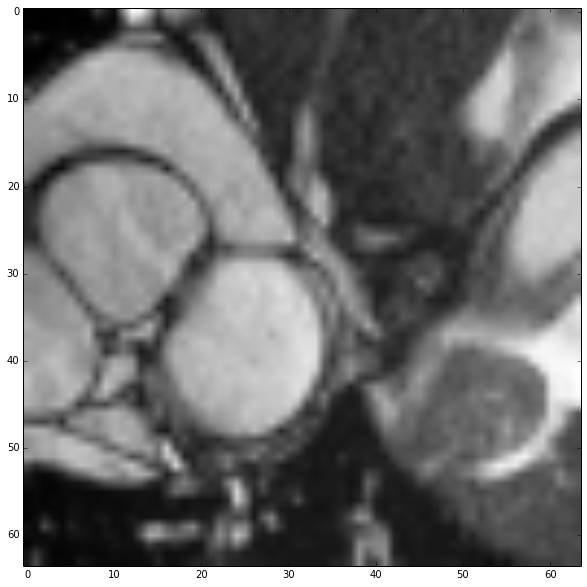

In [55]:
greyplot(im)

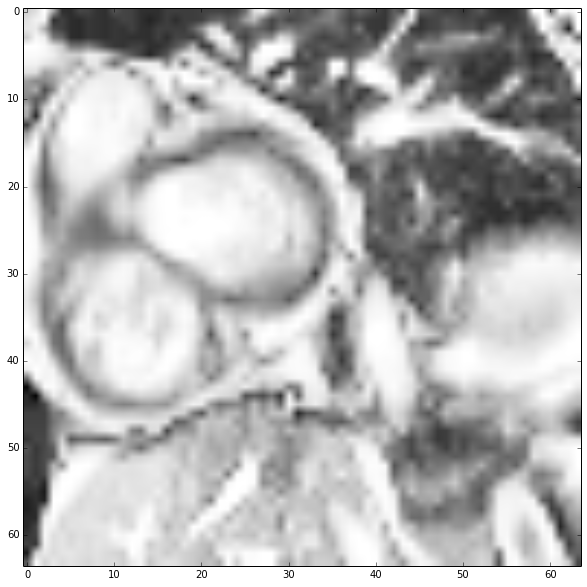

In [40]:
im = exposure.equalize_adapthist(im)
greyplot(im)

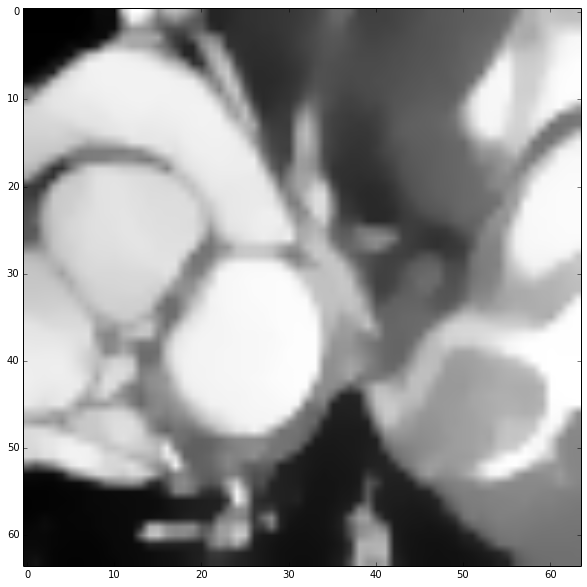

In [57]:
im = exposure.equalize_hist(im)
greyplot(im)

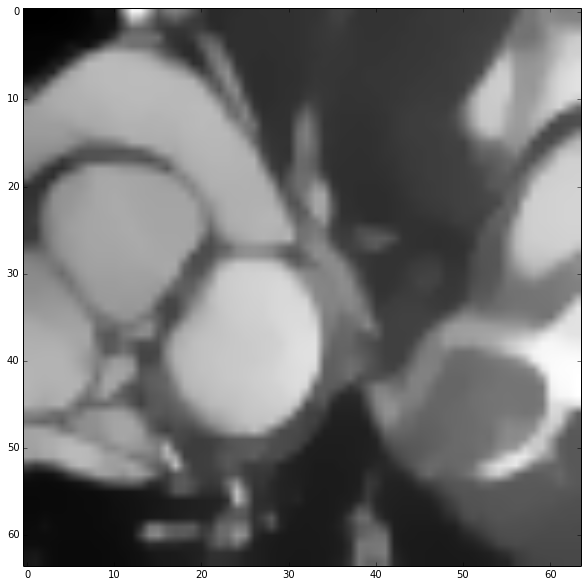

In [56]:
im = denoise_tv_chambolle(im,weight=0.1)
greyplot(im)

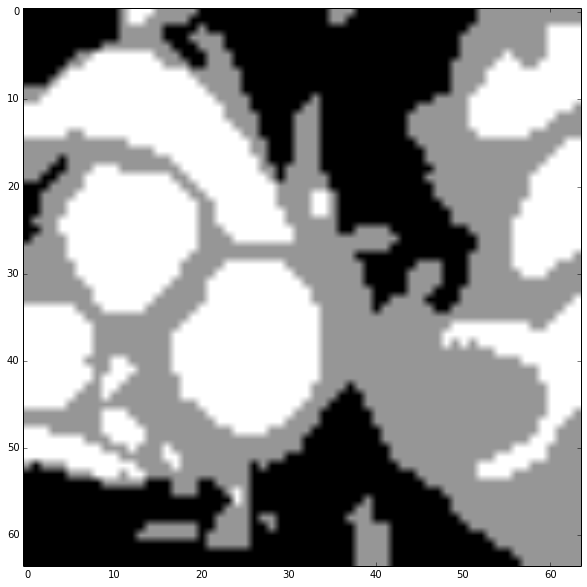

In [58]:
im = cut(0.3,0.7)(im)
greyplot(im)